<a href="https://colab.research.google.com/github/Danil1D/Machine-learning/blob/main/%D0%94%D0%B0%D1%88%D0%BA%D0%B5%D0%B2%D0%B8%D1%87_%D0%BB%D0%B0%D0%B1%E2%84%962(%D0%B7%D0%B0%D0%B2%D0%B4_1)_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
tables = pd.read_html(url)
df = tables[2]
df.columns = ['_'.join(col).strip() for col in df.columns.values]

# 1. Вивести перших 5 рядків
print("\nПерші 5 рядків таблиці:")
print(df.head())





Перші 5 рядків таблиці:
  Country/Territory_Country/Territory IMF[1][13]_Forecast IMF[1][13]_Year  \
0                               World           109529216            2024   
1                       United States            28781083            2024   
2                               China            18532633       [n 1]2024   
3                             Germany             4591100            2024   
4                               Japan             4110452            2024   

  World Bank[14]_Estimate World Bank[14]_Year United Nations[15]_Estimate  \
0               105435540                2023                   100834796   
1                27360935                2023                    25744100   
2                17794782           [n 3]2023                    17963170   
3                 4456081                2023                     4076923   
4                 4212945                2023                     4232173   

  United Nations[15]_Year  
0                    

In [ ]:
# 2. Визначити розмір датасета
print("\nРозмір датасету:")
print(df.shape)


Розмір датасету:
(210, 7)


In [ ]:
# 3. Визначити оптимальну кількість стовпців
print("\nСтовпці таблиці:")
print(df.columns)


Стовпці таблиці:
Index(['Country/Territory_Country/Territory', 'IMF[1][13]_Forecast',
       'IMF[1][13]_Year', 'World Bank[14]_Estimate', 'World Bank[14]_Year',
       'United Nations[15]_Estimate', 'United Nations[15]_Year'],
      dtype='object')


In [ ]:
# 4. Змінюємо назви стовпців на більш зручні
import pandas as pd
import numpy as np

url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
tables = pd.read_html(url)
df = tables[2]
df.columns = ['_'.join(col).strip() for col in df.columns.values]
df.columns = ["Country", "IMF_Forecast", "IMF_Year", "WorldBank_Estimate", "WorldBank_Year", "UN_Estimate", "UN_Year"]
print("\nЗмінені назви стовпців:")
print(df.columns)


Змінені назви стовпців:
Index(['Country', 'IMF_Forecast', 'IMF_Year', 'WorldBank_Estimate',
       'WorldBank_Year', 'UN_Estimate', 'UN_Year'],
      dtype='object')


In [ ]:
# 5. Перевірка типів даних
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
tables = pd.read_html(url)
df = tables[2]
print("\nТипи даних у таблиці:")
print(df.dtypes)


Типи даних у таблиці:
Country/Territory   Country/Territory    object
IMF[1][13]          Forecast             object
                    Year                 object
World Bank[14]      Estimate             object
                    Year                 object
United Nations[15]  Estimate             object
                    Year                 object
dtype: object


In [ ]:
# 6.
import pandas as pd
import numpy as np

url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
tables = pd.read_html(url)
df = tables[2]
df.columns = ['_'.join(col).strip() for col in df.columns.values]
df.replace("—", np.nan, inplace=True)
print("\nКількість пропущених значень:")
print(df.isnull().sum())
df.columns = ['_'.join(col).strip() for col in df.columns.values]
df.columns = ["Country", "IMF_Forecast", "IMF_Year", "WorldBank_Estimate", "WorldBank_Year", "UN_Estimate", "UN_Year"]
df["IMF_Forecast"] = pd.to_numeric(df["IMF_Forecast"].str.replace(',', ''), errors='coerce')
df["WorldBank_Estimate"] = pd.to_numeric(df["WorldBank_Estimate"].str.replace(',', ''), errors='coerce')
df["UN_Estimate"] = pd.to_numeric(df["UN_Estimate"].str.replace(',', ''), errors='coerce')
df['IMF_Year'].fillna(df['IMF_Year'].mode()[0], inplace=True)
df['WorldBank_Year'].fillna(df['WorldBank_Year'].mode()[0], inplace=True)
df['UN_Year'].fillna(df['UN_Year'].mode()[0], inplace=True)


numeric_columns = ["IMF_Forecast", "WorldBank_Estimate", "UN_Estimate"]
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())


Кількість пропущених значень:
Country/Territory_Country/Territory     0
IMF[1][13]_Forecast                    15
IMF[1][13]_Year                        15
World Bank[14]_Estimate                 8
World Bank[14]_Year                     8
United Nations[15]_Estimate             1
United Nations[15]_Year                 1
dtype: int64


In [ ]:
# 7. Перевірка наявності пропущених значень ще раз
print("\nКількість пропущених значень після заміни:")
print(df.isnull().sum())


Кількість пропущених значень після заміни:
Country               0
IMF_Forecast          0
IMF_Year              0
WorldBank_Estimate    0
WorldBank_Year        0
UN_Estimate           0
UN_Year               0
dtype: int64


In [ ]:
# 8. Перевірка наявності дублікатів
print("\nКількість дублікатів:")
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)


Кількість дублікатів:
0


In [ ]:
# 9. Вивести описову статистику
print("\nОписова статистика:")
print(df.describe())


Описова статистика:
       IMF_Forecast  WorldBank_Estimate   UN_Estimate
count  2.100000e+02        2.100000e+02  2.100000e+02
mean   1.123228e+06        1.037206e+06  9.612699e+05
std    7.900707e+06        7.602076e+06  7.275608e+06
min    6.600000e+01        6.200000e+01  5.900000e+01
25%    1.464775e+04        1.044175e+04  8.928250e+03
50%    6.215800e+04        4.341600e+04  3.210250e+04
75%    4.366365e+05        3.376592e+05  2.412485e+05
max    1.095292e+08        1.054355e+08  1.008348e+08


In [ ]:
# 10. Визначення відхилення між показниками IMF_Forecast та WorldBank_Estimate
df['Difference_IMF_WB'] = df['IMF_Forecast'] - df['WorldBank_Estimate']
print("\nКраїни з найбільшими відхиленнями між IMF_Forecast та WorldBank_Estimate:")
print(df[['Country', 'Difference_IMF_WB']].sort_values(by='Difference_IMF_WB', ascending=False).head())


Країни з найбільшими відхиленнями між IMF_Forecast та WorldBank_Estimate:
                      Country  Difference_IMF_WB
0                       World       4.093676e+06
1               United States       1.420148e+06
196  Turks and Caicos Islands       1.121826e+06
193              Sint Maarten       1.121605e+06
178                   Curaçao       1.120154e+06


In [ ]:
# 11. Обчислення кореляції між показниками
print("\nКореляція між показниками:")
print(df[['IMF_Forecast', 'WorldBank_Estimate', 'UN_Estimate']].corr())


Кореляція між показниками:
                    IMF_Forecast  WorldBank_Estimate  UN_Estimate
IMF_Forecast            1.000000            0.999351     0.999246
WorldBank_Estimate      0.999351            1.000000     0.999656
UN_Estimate             0.999246            0.999656     1.000000


In [ ]:
# 12. Обчислення середнього значення для кожного стовпця
print("\nСереднє значення для кожного року:")
print(df[['IMF_Forecast', 'WorldBank_Estimate', 'UN_Estimate']].mean())


Середнє значення для кожного року:
IMF_Forecast          1.123228e+06
WorldBank_Estimate    1.037206e+06
UN_Estimate           9.612699e+05
dtype: float64


In [ ]:
# 13. Обчислення стандартного відхилення для кожної країни
df['Std_Deviation'] = df[['IMF_Forecast', 'WorldBank_Estimate', 'UN_Estimate']].std(axis=1)
print("\nКраїна з найбільшою варіативністю у показниках:")
print(df[['Country', 'Std_Deviation']].sort_values(by='Std_Deviation', ascending=False).head(1))


Країна з найбільшою варіативністю у показниках:
  Country  Std_Deviation
0   World   4.349674e+06


In [ ]:
# 14. Визначення країни з найвищим та найнижчим показниками
print("\nКраїна з найвищим показником IMF_Forecast:", df.loc[df['IMF_Forecast'].idxmax()]['Country'])
print("Країна з найнижчим показником IMF_Forecast:", df.loc[df['IMF_Forecast'].idxmin()]['Country'])

print("\nКраїна з найвищим показником WorldBank_Estimate:", df.loc[df['WorldBank_Estimate'].idxmax()]['Country'])
print("Країна з найнижчим показником WorldBank_Estimate:", df.loc[df['WorldBank_Estimate'].idxmin()]['Country'])

print("\nКраїна з найвищим показником UN_Estimate:", df.loc[df['UN_Estimate'].idxmax()]['Country'])
print("Країна з найнижчим показником UN_Estimate:", df.loc[df['UN_Estimate'].idxmin()]['Country'])


Країна з найвищим показником IMF_Forecast: World
Країна з найнижчим показником IMF_Forecast: Tuvalu

Країна з найвищим показником WorldBank_Estimate: World
Країна з найнижчим показником WorldBank_Estimate: Tuvalu

Країна з найвищим показником UN_Estimate: World
Країна з найнижчим показником UN_Estimate: Tuvalu


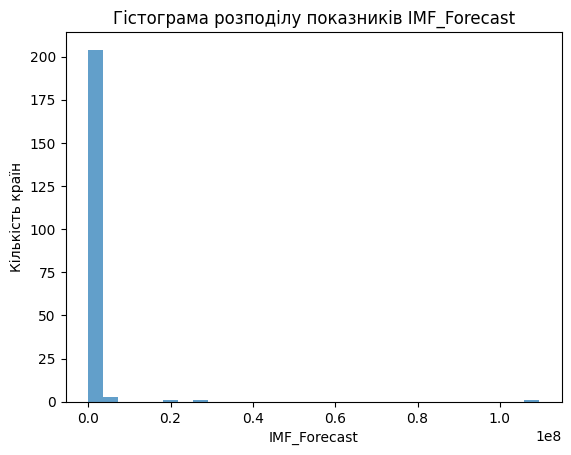

In [ ]:
# 15. Побудова гістограми для розподілу показників IMF_Forecast
plt.hist(df['IMF_Forecast'], bins=30, alpha=0.7)
plt.xlabel('IMF_Forecast')
plt.ylabel('Кількість країн')
plt.title('Гістограма розподілу показників IMF_Forecast')
plt.show()

In [ ]:
# 16. Розрахунок частки кожної країни в загальному значенні для кожного року
df['Share_IMF_Forecast'] = df['IMF_Forecast'] / df['IMF_Forecast'].sum()
df['Share_WorldBank_Estimate'] = df['WorldBank_Estimate'] / df['WorldBank_Estimate'].sum()
df['Share_UN_Estimate'] = df['UN_Estimate'] / df['UN_Estimate'].sum()
print("\nЧастка кожної країни в загальному значенні:")
print(df[['Country', 'Share_IMF_Forecast', 'Share_WorldBank_Estimate', 'Share_UN_Estimate']].head())


Частка кожної країни в загальному значенні:
         Country  Share_IMF_Forecast  Share_WorldBank_Estimate  \
0          World            0.464347                  0.484064   
1  United States            0.122017                  0.125616   
2          China            0.078569                  0.081697   
3        Germany            0.019464                  0.020458   
4          Japan            0.017426                  0.019342   

   Share_UN_Estimate  
0           0.499512  
1           0.127530  
2           0.088985  
3           0.020196  
4           0.020965  


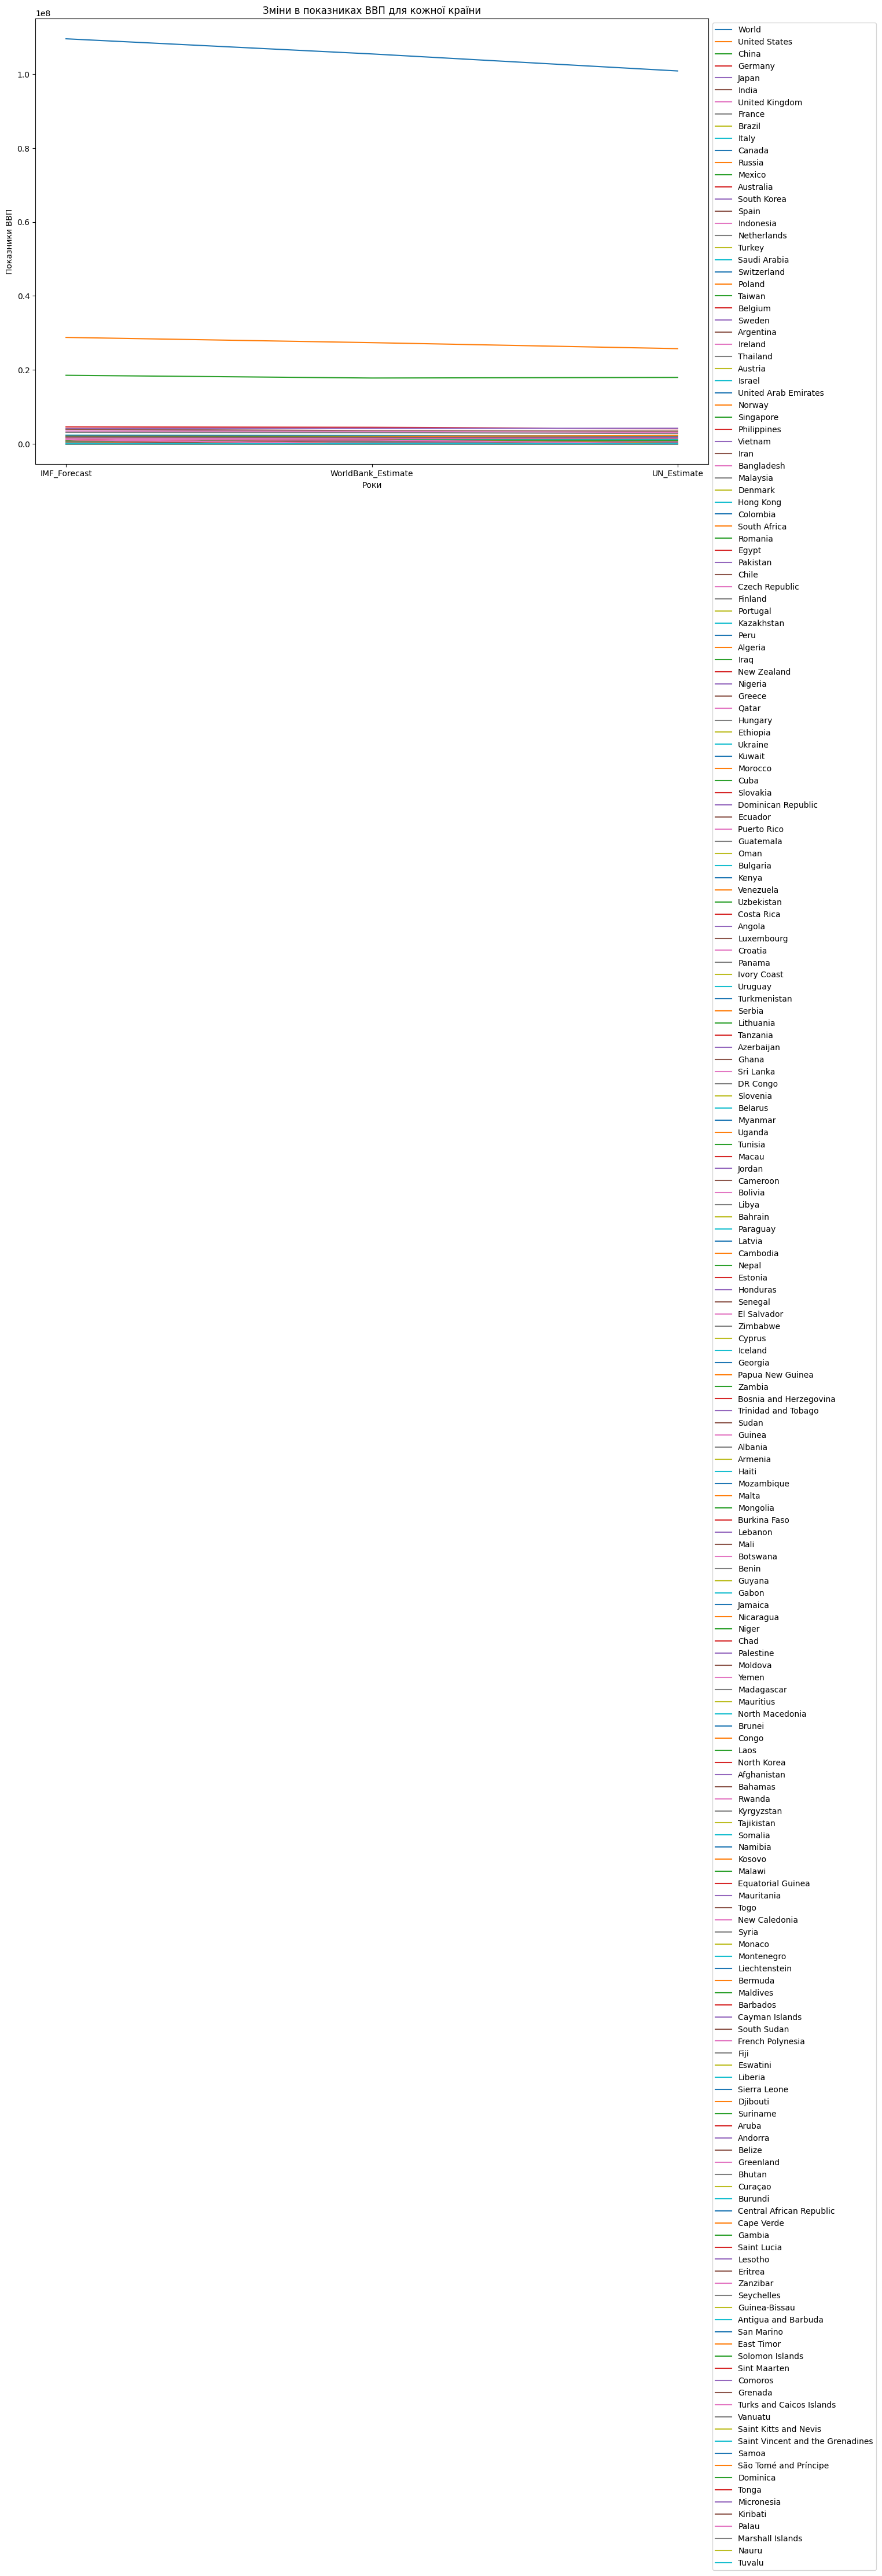

In [ ]:
# 17. Візуалізація змін в показниках для кожної країни
plt.figure(figsize=(15, 10))
for country in df['Country'].unique():
    plt.plot(['IMF_Forecast', 'WorldBank_Estimate', 'UN_Estimate'], df[df['Country'] == country][['IMF_Forecast', 'WorldBank_Estimate', 'UN_Estimate']].values.flatten(), label=country)
plt.xlabel('Роки')
plt.ylabel('Показники ВВП')
plt.title('Зміни в показниках ВВП для кожної країни')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Висновок
Обробка даних: Завантажено таблицю з Вікіпедії, перетворено стовпці та заповнено пропущені значення.

Аналіз: Проведено аналіз відхилень, кореляцій, розподілу та часток економічних показників ВВП для різних країн.

Візуалізація: Побудовані графіки для відображення змін у показниках ВВП та їх розподілу.